In [53]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matrixprofile.discover import snippets
import pandas as pd
from sklearn import preprocessing


In [13]:
p = Path('../Dataset/WalkRun1_80_3800_200.txt')
a = np.loadtxt(p)

In [63]:
a

array([ 0.014993 , -0.043289 , -0.0039098, ...,  1.7561   ,  1.4959   ,
        1.3823   ])

In [68]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(a.reshape(-1,1)).T[0]

In [69]:
x_scaled

array([0.48981087, 0.48807958, 0.48924935, ..., 0.54153101, 0.53380169,
       0.53042716])

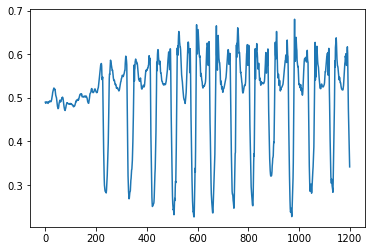

In [70]:
plt.plot(x_scaled[:1200])

In [109]:
n = 2
snp = snippets(x_scaled, num_snippets=n, snippet_size =300)
nerb = []
for item in snp:
    nerb.append(item["fraction"])
fract = np.array(nerb).min()
print(fract)
while True:
    n+=1
    print(n)
    snp_ = snippets(x_scaled, num_snippets=n, snippet_size =300)
    nerb = []
    print(len(snp))
    for item in snp_:
        nerb.append(item["fraction"])
    print(nerb)
    fract = np.array(nerb).min()
    print(fract)
    if(fract>0.1):
        snp = snp_
    else:
        break

0.4328985507246377
3
2
[0.3118840579710145, 0.4308695652173913, 0.257536231884058]
0.257536231884058
4
3
[0.27695652173913043, 0.4072463768115942, 0.25420289855072464, 0.06188405797101449]
0.06188405797101449


In [114]:
arr_snp=[]
for i, item in enumerate(snp):
    dict_ = {}
    dict_["key"] = i
    dict_["snippet"] = item['snippet']
    dict_["fraction"] = item['fraction']
    neighbors = []
    for neighbor in item['neighbors']:
        
        neighbors.append(a[neighbor:neighbor+300].tolist())
    dict_["neighbors"] = neighbors
    arr_snp.append(dict_)

In [115]:
df = pd.DataFrame(arr_snp, columns = arr_snp[0].keys())

In [116]:
df.neighbors.iloc[0][0]

[0.014993,
 -0.043289,
 -0.0039098,
 -0.038406,
 0.001217,
 0.0039053,
 -0.0056399,
 0.041869,
 0.022735,
 0.0057023,
 -0.058769,
 -0.077791,
 -0.020924,
 0.013635,
 0.032242,
 0.013288,
 0.075449,
 0.10948,
 0.10239,
 0.10144,
 0.08244,
 0.052928,
 0.050659,
 0.075252,
 0.135,
 0.21442,
 0.35761,
 0.46654,
 0.5704,
 0.75174,
 0.84618,
 0.95545,
 0.99578,
 1.0544,
 1.1102,
 1.0593,
 1.0259,
 0.98952,
 1.0181,
 0.91427,
 0.7277,
 0.56975,
 0.48694,
 0.41703,
 0.36731,
 0.18151,
 0.020582,
 -0.13585,
 -0.3112,
 -0.3806,
 -0.48301,
 -0.47275,
 -0.43213,
 -0.30499,
 -0.11023,
 -0.010379,
 0.060689,
 0.13875,
 0.17358,
 0.10334,
 0.028115,
 0.12132,
 0.11685,
 0.16946,
 0.24593,
 0.29712,
 0.3733,
 0.34803,
 0.40126,
 0.34167,
 0.29265,
 0.11621,
 -0.05593,
 -0.23296,
 -0.34429,
 -0.45599,
 -0.55294,
 -0.59927,
 -0.62409,
 -0.5462,
 -0.46966,
 -0.39328,
 -0.25645,
 -0.18715,
 -0.095084,
 -0.032551,
 -0.066344,
 -0.039008,
 -0.058482,
 -0.093507,
 -0.093931,
 -0.10423,
 -0.11938,
 -0.13843,


In [117]:
p = Path('../Dataset/WalkRun1_80_3800_200.csv')
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))
df.to_csv(p)